## Libaries

In [82]:
# Installations
# !pip install pandas
# !pip install plotly==5.11.0
# !pip install chart-studio
# !pip install matplotlib 
# !pip install scipy
# ! pip install nbformat>=4.2.0
# ! pip install ipykernel
# ! pip install --upgrade nbformat
# ! pip install seaborn
# ! pip install -U scikit-learn


In [83]:
import pandas as pd
import numpy as np

# Graphing libraries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns


# Modeling libraries
from sklearn import tree # Decision tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Loading the data

- What files do we have
- What is the contents of the files
- Which data is useful for us

In [84]:
# list files
%ls data

data_path = "data/"

 Volume in drive D is Extra
 Volume Serial Number is B02E-DE77

 Directory of d:\Projects\CreditScoringModel\data

28-Nov-22  08:43    <DIR>          .
28-Nov-22  10:06    <DIR>          ..
28-Nov-22  08:43             9,855 sample_submission.csv
28-Nov-22  08:43           207,952 Test.csv
28-Nov-22  08:43           644,291 Train.csv
28-Nov-22  08:43         2,460,705 unlinked_masked_final.csv
28-Nov-22  08:43             1,323 VariableDefinitions.csv
               5 File(s)      3,324,126 bytes
               2 Dir(s)  51,532,398,592 bytes free


In [85]:
# Read the VariableDefinitions file
var_defs = pd.read_csv(data_path + 'VariableDefinitions.csv')
ff.create_table(var_defs)

### Understanding the variables and commenting on them
#### Key variables
- **Value:** Actual amount being transacted
- **Amount:** Cumulative amount with costs
(These two variables can tell us how transaction costs affect transaction behavior e.g. When transacting large sums of money, do people split them in smaller transactions, etc)
- **IssuedDate, PaidOnDate, DueData:** Track the duration of the loan
(From this we can create 2 variables 1. LoanDuration(Days) 2. OverDue (T/F))
- **AmountLoan:** Value of the loan
- **IsDefaulted:** Was the loan repaid or not
- **InvestorId:** Does the investor/institution affect how likely one can receive a loan? Are there institutions with more defaulters?
- **TransactionStatus:** (y) -> Loan accepted or rejected

#### Might be useful
- _TransactionStartTime:_ We can get patterns of transactions, what days/time are they at peak, low etc
- _ProviderId:_ Does a certain source has more transactions/customer. Are there regular people for the provider
- _ProductId:_ Is a certain product more bought. What are the trends and patterns?
- _ProductCategory_ (Same as above)
- _ChannelId:_ Is there a preferred channel of transacting?
- _InvestorId:_ Are there financial services that are more preferred for loans?

#### Sensitive variables
- CustomerId: Do we want our model to associate a customer with some fixed prediction even if their behavior might change. This could create a potential bias.

#### Not necessarily useful
- TransactionId (But can we find transactions that are anomalous?)
- BatchId
- SubscriptionID
- CurrencyCode
- CountryCode


NB: For starters though we explore the features we shall first use the same number of features as in the test dataset.   

In [86]:
# Load the training and test datasets
training_data = pd.read_csv(data_path+'Train.csv')
training_data.head(10)

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CustomerId_27,2018-09-28 12:40:48,500.0,-500.0,TransactionId_930,BatchId_357,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CustomerId_27,2018-10-03 09:34:04,500.0,-500.0,TransactionId_1381,BatchId_8,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CustomerId_27,2018-10-17 09:06:16,1235.0,-1235.0,TransactionId_255,BatchId_1082,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CustomerId_27,2018-10-17 12:02:45,1235.0,-1235.0,TransactionId_543,BatchId_1195,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CustomerId_258,2018-10-18 16:11:55,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_62,2018-10-22 09:13:17,1.0,InvestorId_3,2018-11-17 16:11:04,NaN,PayBackId_1791,ThirdPartyId_648,0.0,0.0


In [87]:
# Check the number of training instances
len(training_data)

2100

In [88]:
# Load in the test dataset
test_data = pd.read_csv(data_path+'Test.csv')
test_data.head(5)

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [89]:
# Check the testing instance
len(test_data)

905

In [90]:
# Percentage split
round(len(test_data)/(len(training_data) + len(test_data)) * 100, 0)

30.0

## Exploring the data

> ### Cursory Examination

#### >> Variable types

In [91]:
training_data.info(memory_usage=True)
# We observe that we have 6 features that are float64, 2 features that are int64, and 19 features that are of type object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [92]:
# Check numeric data stats
training_data.describe()

# We observe that TransactionStatus, IsDinalPayBack, IsThirdPartyConfirmed and IsDefault look like categorical data 1-0

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


#### >> Filtering out categorical variables

In [93]:
# Confirm the assumption and store these columns under categorical label

categorical_cols = []
for col in training_data.select_dtypes('number'):
    if len(training_data[col].unique()) <= 3: # 1,0 or Nan
        categorical_cols.append(col) # add it to the categorial variable
        print(f'{col} unique values: {training_data[col].unique()}')

CountryCode unique values: [256]
TransactionStatus unique values: [0 1]
IsFinalPayBack unique values: [nan  1.  0.]
IsThirdPartyConfirmed unique values: [nan  0.  1.]
IsDefaulted unique values: [nan  0.  1.]


In [94]:
# Remove the country code
categorical_cols.remove('CountryCode')
categorical_cols

['TransactionStatus', 'IsFinalPayBack', 'IsThirdPartyConfirmed', 'IsDefaulted']

#### >> Checking Null Values

In [95]:
# todo: Get the columns with null values and their number
training_data.isnull().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [96]:
# Total number of null values
training_data.isnull().values.sum()

7965

In [97]:
# Number of datapoints
len(training_data) * len(training_data.columns)

56700

In [98]:
#Percentage of null values against the whole dataset
round((training_data.isnull().values.sum()/(len(training_data) * len(training_data.columns))) * 100, 2)

14.05

#### >> Filter out numeric data

In [99]:
# Get columns with numeric data
numeric_training_data = training_data.select_dtypes('number')
numeric_training_data

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
0,550.0,-550.0,256,0,NaN,NaN,NaN,NaN
1,550.0,-550.0,256,0,NaN,NaN,NaN,NaN
2,550.0,-550.0,256,0,NaN,NaN,NaN,NaN
3,1000.0,-1000.0,256,0,NaN,NaN,NaN,NaN
4,500.0,-500.0,256,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,256,1,2370.0,1.0,1.0,0.0
2096,5000.0,-5000.0,256,1,5925.0,1.0,1.0,0.0
2097,5000.0,-5000.0,256,1,7100.0,1.0,1.0,0.0
2098,1500.0,-1500.0,256,1,1733.0,1.0,1.0,0.0


In [100]:
# drop country code
numeric_training_data.drop(columns=categorical_cols, inplace=True)
numeric_training_data.drop(columns='CountryCode', inplace=True)
numeric_training_data

,Value,Amount,AmountLoan
0,550.0,-550.0,NaN
1,550.0,-550.0,NaN
2,550.0,-550.0,NaN
3,1000.0,-1000.0,NaN
4,500.0,-500.0,NaN
...,...,...,...
2095,2000.0,-2000.0,2370.0
2096,5000.0,-5000.0,5925.0
2097,5000.0,-5000.0,7100.0
2098,1500.0,-1500.0,1733.0


In [101]:
# Total numeric data with null
numeric_training_data.isnull().values.sum()

612

In [102]:
# Specific columns with null
numeric_training_data.isnull().sum()

Value           0
Amount          0
AmountLoan    612
dtype: int64

### Data Distribution

#### >> Numeric Distribution

In [103]:
# Numeric 
numeric_training_data.std()

Value         153949.804606
Amount        153965.306021
AmountLoan     76665.059508
dtype: float64

In [104]:
fig_sub = make_subplots(rows=1, cols=3, horizontal_spacing=.2, subplot_titles=(numeric_training_data.columns))
col_num = 1

for col in numeric_training_data.columns:
    fig_sub.add_traces(
        go.Histogram(x=numeric_training_data[col]), rows=1, cols=col_num
    )
    col_num += 1

fig_sub.update_layout(height=400, width=1000, title_text="Numeric Data Distribution")
fig_sub.show()

> #### Why is the amount negative of the value?

In [105]:
# To confirm if the values are same we get absolute value for amount and compare it to value column
numeric_training_data['Amount_abs'] = numeric_training_data['Amount'].apply(lambda x: abs(x))
numeric_training_data['Amount_abs']

0        550.0
1        550.0
2        550.0
3       1000.0
4        500.0
         ...  
2095    2000.0
2096    5000.0
2097    5000.0
2098    1500.0
2099    1000.0
Name: Amount_abs, Length: 2100, dtype: float64

In [106]:
numeric_training_data['Value'].equals(numeric_training_data['Amount_abs'])

False

In [107]:
# get the specific values that don't match
numeric_training_data['Amount_Val_Diff'] = np.where((numeric_training_data['Amount_abs'] != numeric_training_data['Value']), numeric_training_data['Amount_abs'], np.nan)
numeric_training_data['Amount_Val_Diff'].isna().sum()

1938

**So it is not always the case that amount recorded is the negative of value**

#### >> Categorical Distribution

In [108]:
categorical_cols

['TransactionStatus', 'IsFinalPayBack', 'IsThirdPartyConfirmed', 'IsDefaulted']

In [109]:
fig_sub = make_subplots(rows=2, cols=2, horizontal_spacing=.2, subplot_titles=(categorical_cols))
row_num = col_num = 1

# training_data[categorical_cols]

for col in categorical_cols:
    fig_sub.add_traces(
        go.Histogram(x=training_data[col]), rows=row_num, cols=col_num
    )
    
    if col_num % 2 == 0:
        # reset col num & increment row num
        col_num=0
        row_num+=1

    col_num+=1

fig_sub.update_layout(height=1000, width=1000, title_text="Categorical Data Distribution")
fig_sub.show()

**We observe class imbalance for the categorical variables**

## Data Cleaning

#### Handling Null Values

In [110]:
training_data.columns[training_data.isna().any()].tolist()

['IssuedDateLoan',
 'AmountLoan',
 'Currency',
 'LoanId',
 'PaidOnDate',
 'IsFinalPayBack',
 'InvestorId',
 'DueDate',
 'LoanApplicationId',
 'PayBackId',
 'ThirdPartyId',
 'IsThirdPartyConfirmed',
 'IsDefaulted']

In [111]:
#UDF
def fillna_nearest(df, series_name):
    """
    https://stackoverflow.com/questions/43586058/pandas-interpolate-with-nearest-for-non-numeric-values
    https://stackoverflow.com/questions/68745880/interpolatemethod-nearest-in-a-groupby-in-pandas
    :param df:
    :param series_name:
    :return:
    """

    # Convert the column to a categorical type
    fact = df[series_name].astype('category').factorize()
    
    # get string as categorical (-1 is NaN)
    df[series_name+"_cat"] = pd.Series(fact[0]).replace(-1, np.nan)

    print(fact)
    print(df[series_name+"_cat"].head(5))

    # Interpolate the categorical values
    df.loc[:, series_name+"_cat"] = df.groupby('CustomerId', group_keys=True)[series_name+"_cat"].apply(lambda group: group.interpolate(method='nearest') if np.count_nonzero(np.isnan(group)) < (len(group) - 1) else group)

    # Map back from categories to string
    cat_to_string = {i:x for i,x in enumerate(fact[1])} # dict connecting category to string
    series_str_interp = df.loc[:, series_name+"_cat"].map(cat_to_string) # turn category back to string

    return series_str_interp


In [112]:
# Amount Loan
training_data['AmountLoan'].fillna(training_data['AmountLoan'].mean(), inplace=True)

# IsFinalPayBack
training_data['IsFinalPayBack'].fillna(training_data['IsFinalPayBack'].mode()[0], inplace=True)

# IsDefaulted
training_data['IsDefaulted'].fillna(training_data['IsDefaulted'].mode()[0], inplace=True)


# Todo: Best way to fill these
# Due Date
# LoanId
# PaidOnDate
# InvestorId
# LoanApplicationId
# PaybackId
# ThirdPartyId
# IsThirdPartyConfirmed
# IssuedDateLoan
# training_data['IssuedDateLoan'].fillna(method='bfill')

In [113]:
# Recheck columns with null
training_data.columns[training_data.isna().any()].tolist()

['IssuedDateLoan',
 'Currency',
 'LoanId',
 'PaidOnDate',
 'InvestorId',
 'DueDate',
 'LoanApplicationId',
 'PayBackId',
 'ThirdPartyId',
 'IsThirdPartyConfirmed']

#### Handling Outliers

Text(0.5, 1.0, 'Box plot for numeric variables')

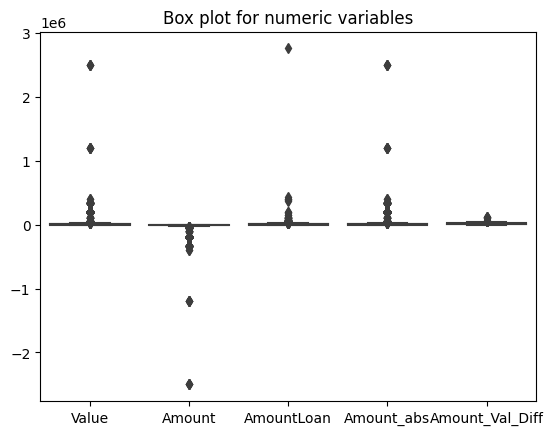

In [114]:
sns.boxplot(data=numeric_training_data)
plt.title('Box plot for numeric variables')

In [115]:
from scipy.stats import iqr
iqr(numeric_training_data, rng=(25, 75), axis=0, keepdims=True)

array([[11000., 11000.,    nan, 11000.,    nan]])

**The outliers need not to be dropped since expenditure can be variable**

## Variable Selection

We want to use the same columns as the testing data for starters

In [116]:
test_data.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [117]:
X = training_data.loc[:, test_data.columns]
X

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,LoanId_293,InvestorId_1,LoanApplicationId_524,ThirdPartyId_857
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,LoanId_1040,InvestorId_1,LoanApplicationId_1441,ThirdPartyId_958
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,LoanId_1585,InvestorId_1,LoanApplicationId_1466,ThirdPartyId_1981
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,LoanId_1314,InvestorId_1,LoanApplicationId_1389,ThirdPartyId_705


In [118]:
y = training_data.iloc[:, -1]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2095    0.0
2096    0.0
2097    0.0
2098    0.0
2099    0.0
Name: IsDefaulted, Length: 2100, dtype: float64

> #### LabelEncoding

In [129]:
for col in X.columns:
    print(col, X[col].nunique())

CustomerId 421
TransactionStartTime 1760
Value 98
Amount 77
TransactionId 1758
BatchId 1713
SubscriptionId 6
CurrencyCode 1
CountryCode 1
ProviderId 1
ProductId 16
ProductCategory 7
ChannelId 1
TransactionStatus 2
IssuedDateLoan 1159
LoanId 1159
InvestorId 3
LoanApplicationId 1156
ThirdPartyId 1481


## Model Building

> #### Decision Tree

In [120]:
X

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,LoanId_293,InvestorId_1,LoanApplicationId_524,ThirdPartyId_857
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,LoanId_1040,InvestorId_1,LoanApplicationId_1441,ThirdPartyId_958
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,LoanId_1585,InvestorId_1,LoanApplicationId_1466,ThirdPartyId_1981
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,LoanId_1314,InvestorId_1,LoanApplicationId_1389,ThirdPartyId_705


In [119]:
dec_tree = tree.DecisionTreeRegressor()
dec_clf = dec_tree.fit(X, y)
dec_clf.predict(test_data)

ValueError: could not convert string to float: 'CustomerId_27'

> #### Random Forest

> #### MLP Regressor

In [130]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
regr.predict(test_data)

ValueError: could not convert string to float: 'CustomerId_27'